***ДатаСет про продажі в інтернет-магазині:***
---


***date:***  дата;

***category:***  категорія товару;

 ***units_sold:***  кількість проданих одиниць;

 ***revenue_usd:***  дохід у доларах;

 ***traffic_source:***  джерело трафіку

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data = {
    "date": ["2024-09-01","2024-09-01","2024-09-02","2024-09-02","2024-09-03","2024-09-03","2024-09-04","2024-09-04","2024-09-05","2024-09-05","2024-09-06","2024-09-06","2024-09-07","2024-09-07","2024-09-08","2024-09-08","2024-09-09","2024-09-09","2024-09-10","2024-09-10"],
    "category": ["Electronics","Clothing","Books","Electronics","Furniture","Clothing","Books","Electronics","Furniture","Clothing","Books","Electronics","Furniture","Clothing","Books","Electronics","Furniture","Clothing","Books","Electronics"],
    "units_sold": [15,30,20,10,5,25,18,8,12,22,25,7,6,28,15,11,7,18,20,12],
    "revenue_usd": [1500,750,300,1200,500,625,270,960,1200,550,375,840,600,700,225,1320,700,450,300,1440],
    "traffic_source": ["Direct","Organic Search","Social Media","Direct","Google Ads","Direct","Organic Search","Social Media","Google Ads","Social Media","Organic Search","Direct","Google Ads","Social Media","Organic Search","Direct","Google Ads","Social Media","Direct","Organic Search"],
}

df = pd.DataFrame(data)
print(df)

          date     category  units_sold  revenue_usd  traffic_source
0   2024-09-01  Electronics          15         1500          Direct
1   2024-09-01     Clothing          30          750  Organic Search
2   2024-09-02        Books          20          300    Social Media
3   2024-09-02  Electronics          10         1200          Direct
4   2024-09-03    Furniture           5          500      Google Ads
5   2024-09-03     Clothing          25          625          Direct
6   2024-09-04        Books          18          270  Organic Search
7   2024-09-04  Electronics           8          960    Social Media
8   2024-09-05    Furniture          12         1200      Google Ads
9   2024-09-05     Clothing          22          550    Social Media
10  2024-09-06        Books          25          375  Organic Search
11  2024-09-06  Electronics           7          840          Direct
12  2024-09-07    Furniture           6          600      Google Ads
13  2024-09-07     Clothing       

In [3]:
df.head()

,date,category,units_sold,revenue_usd,traffic_source
0,2024-09-01,Electronics,15,1500,Direct
1,2024-09-01,Clothing,30,750,Organic Search
2,2024-09-02,Books,20,300,Social Media
3,2024-09-02,Electronics,10,1200,Direct
4,2024-09-03,Furniture,5,500,Google Ads


In [4]:
df.shape

(20, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            20 non-null     object
 1   category        20 non-null     object
 2   units_sold      20 non-null     int64 
 3   revenue_usd     20 non-null     int64 
 4   traffic_source  20 non-null     object
dtypes: int64(2), object(3)
memory usage: 932.0+ bytes


In [6]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            20 non-null     datetime64[ns]
 1   category        20 non-null     object        
 2   units_sold      20 non-null     int64         
 3   revenue_usd     20 non-null     int64         
 4   traffic_source  20 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 932.0+ bytes


# ***1.***

***Створи стовпчастий графік, що показує середній дохід для кожної категорії товарів:***
* Встанови порядок категорій за спаданням середнього доходу
* Продажі якої категорії у середньому найбільші?
* Яка категорія продається менше всіх?


In [8]:
mean_revenua_by_category = df.groupby("category")["revenue_usd"].mean().sort_values(ascending=False).index
mean_revenua_by_category

Index(['Electronics', 'Furniture', 'Clothing', 'Books'], dtype='object', name='category')

/tmp/ipython-input-518457388.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="category", y="revenue_usd", order=mean_revenua_by_category, estimator=np.median, palette="viridis", errorbar=("ci", False))


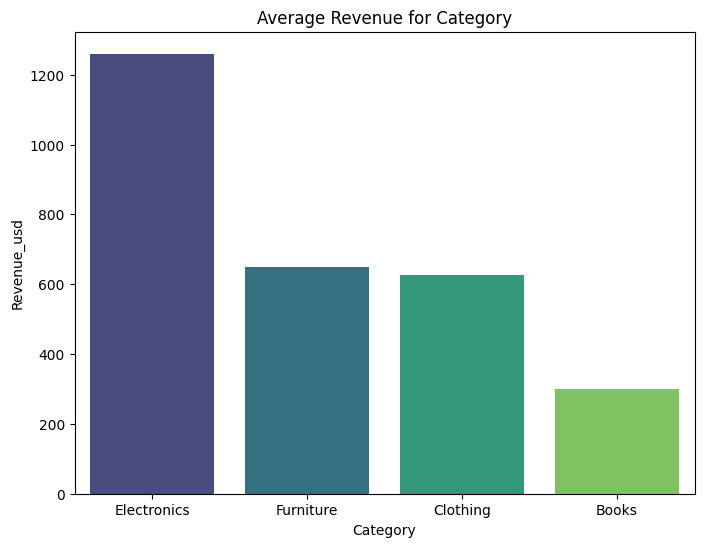

In [35]:
plt.figure(figsize=(8, 6))

sns.barplot(data=df, x="category", y="revenue_usd", order=mean_revenua_by_category, estimator=np.median, palette="viridis", errorbar=("ci", False))
plt.title("Average Revenue for Category")
plt.xlabel("Category")
plt.ylabel("Revenue_usd")

sns.color_palette(palette=None, n_colors=None, desat=None, as_cmap=False)

plt.show()

***Категорія продукції Electrionis має найбільші у середньому продажі***

***Найменьше продаж у категорії - Books***

# ***2.***

***Додай на попередній графік джерело трафіку як колір (hue).***

***Зроби висновки щодо популярності джерел трафіку.***

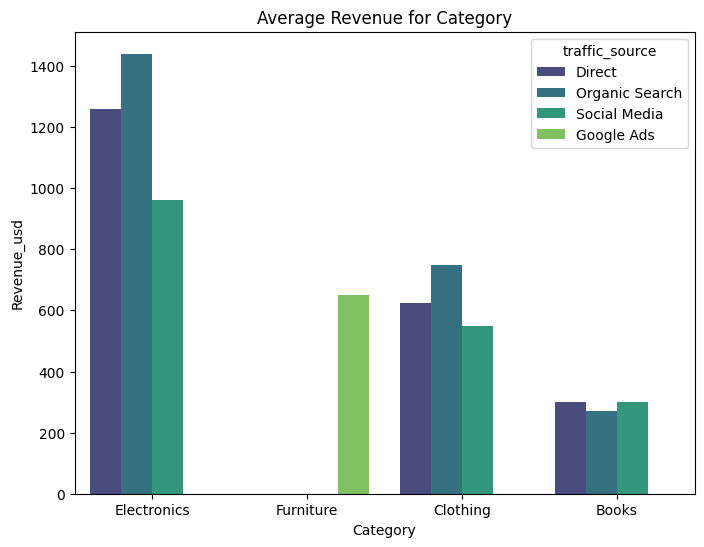

In [36]:
plt.figure(figsize=(8, 6))

sns.barplot(data=df, x="category", y="revenue_usd",  hue=df['traffic_source'], order=mean_revenua_by_category, estimator=np.median, palette="viridis", errorbar=("ci", False))
plt.title("Average Revenue for Category")
plt.xlabel("Category")
plt.ylabel("Revenue_usd")

sns.color_palette(palette=None, n_colors=None, desat=None, as_cmap=False)

plt.show()

***Найбільш популярний тип трафіку в трьох категоріях продукції Electronics, Clothing, Books - Organic Search***

***Не сильно популярний, але дієвий для категорії Furniture - Google Ads***

# ***3.***


***Побудуй діаграму розсіювання для візуалізації зв'язку між кількістю товару у замовленні та доходом:***

* Встанови розмір маркерів у 100 одиниць для більшої наочності. Для цього додай параметр s=100;

* Що можна сказати про характер взаємозв'язку між кількістю товару у замовленні та доходом?


/tmp/ipython-input-646081441.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x="units_sold", y="revenue_usd", palette="viridis", size="units_sold", sizes=(30, 300), s=100)


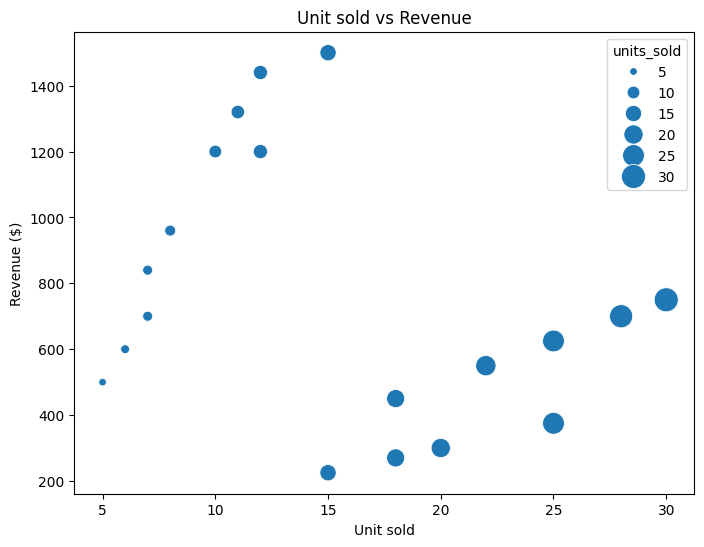

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="units_sold", y="revenue_usd", palette="viridis", size="units_sold", sizes=(30, 300), s=100)
plt.title("Unit sold vs Revenue")
plt.xlabel("Unit sold")
plt.ylabel("Revenue ($)")
plt.show()

***Дохід не залежить від кількості проданого товару.***

# ***4.***

***Додай категорію товару як колір на попередній графік:***

* Обери палітру "deep" для цього.

* Чи є відмінності між категоріями на цьому графіку? Як би ти їх охарактеризував(-ла)?

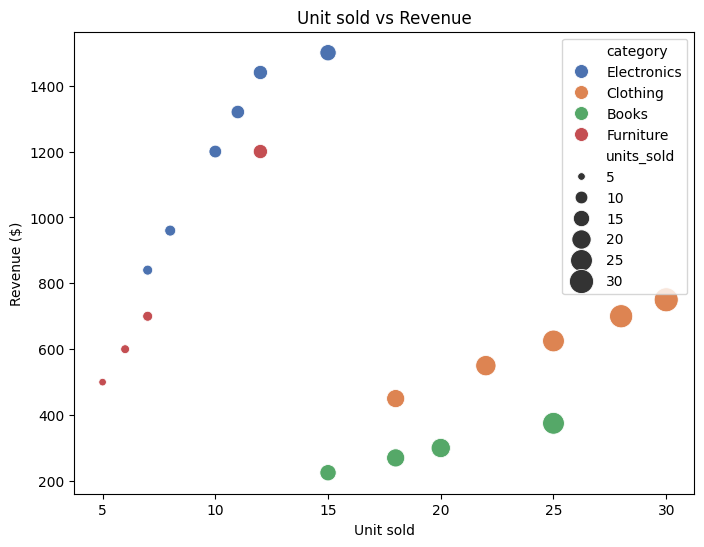

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="units_sold", y="revenue_usd", hue="category", palette="deep", size="units_sold", sizes=(30, 300), s=100)
plt.title("Unit sold vs Revenue")
plt.xlabel("Unit sold")
plt.ylabel("Revenue ($)")
plt.show()

***Категорії Electronics та Furniture, мають великий прибуток з меншою кількістю проданих товарів.***